In [15]:
import numpy as np
from matplotlib import pyplot as plt

In [16]:
np.random.seed(12345)
def makeline(r, theta, tmin=-1, tmax=1, n=50, noise=0.01):
    #     r=0.5
    #     theta = 30*np.pi/180
    r0 = r*np.array([np.cos(theta), np.sin(theta)])
    rt = np.array([np.cos(theta+np.pi/2), np.sin(theta+np.pi/2)])

    xy = np.array([r0 + rt*t for t in np.linspace(tmin, tmax, n)])
    xy = xy + np.random.randn(n, 2)*noise
    return xy
#uncomment if you wanna cheat
xy1 = makeline(0.5, 30*np.pi/180)
#plt.plot(xy1[:,0], xy1[:,1], '.')
xy2 = makeline(0.7, -20*np.pi/180)
#plt.plot(xy2[:,0], xy2[:,1], '.')
xy3 = makeline(0, -20*np.pi/180)
#plt.plot(xy3[:,0], xy3[:,1], '.')
xy4 = makeline(0, 30*np.pi/180)
#plt.plot(xy4[:,0], xy4[:,1], '.')

data = np.vstack([xy1, xy2, xy3, xy4])
np.random.shuffle(data)


# Hough Transform(Line Version)

Can you find equation of the lines in this pic(programatically)???

Can you find the corners?

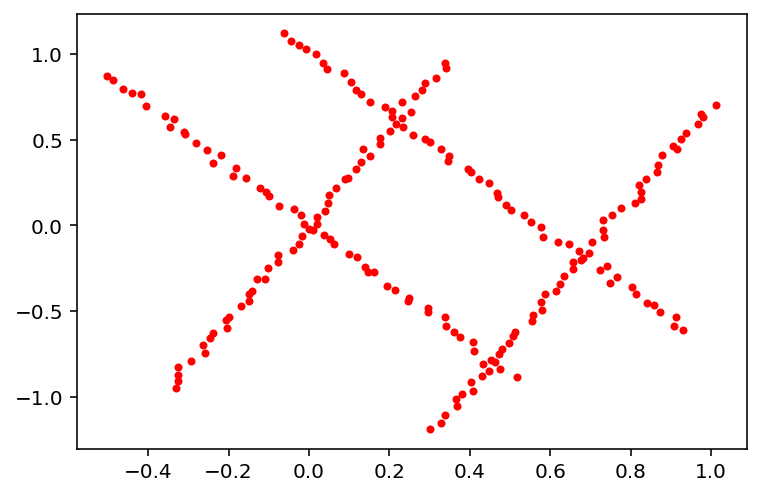

In [17]:
plt.plot(data[:, 0], data[:, 1], '.r')

## Convince your self that a line can be parametrize by $r$ and $\theta$. Write a parametric equation for the line.

## Draw a line with $r=2$, $\theta=30\deg$

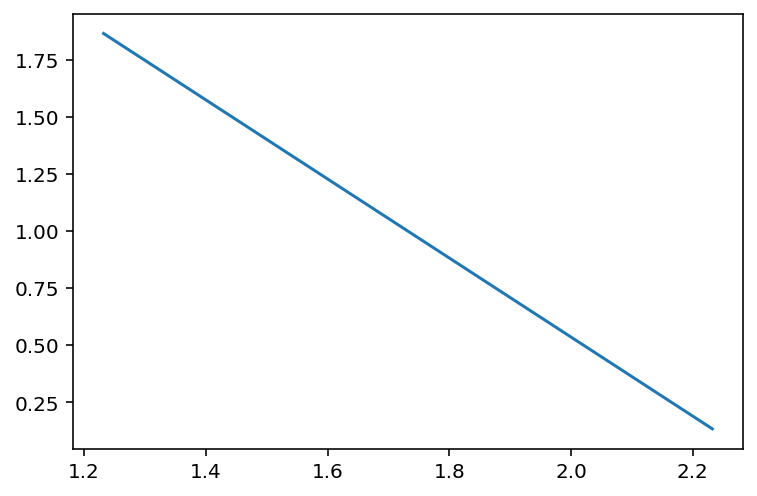

In [18]:
def generate_line(r, rad, tmin=-1, tmax=1, n=20): 
    r0 = r*np.array([np.cos(rad), np.sin(rad)])
    rt = np.array([np.cos(rad+np.pi/2), np.sin(rad+np.pi/2)])
    ret = []
    for t in np.linspace(tmin, tmax, n):
        ret.append(r0 + rt*t)
    return np.array(ret)

line = generate_line(2, 30*np.pi/180)
plt.plot(line[:,0], line[:, 1])

## For a point (x,y) what is the set of $r$ and $\theta$ for line that passes through point x and y.

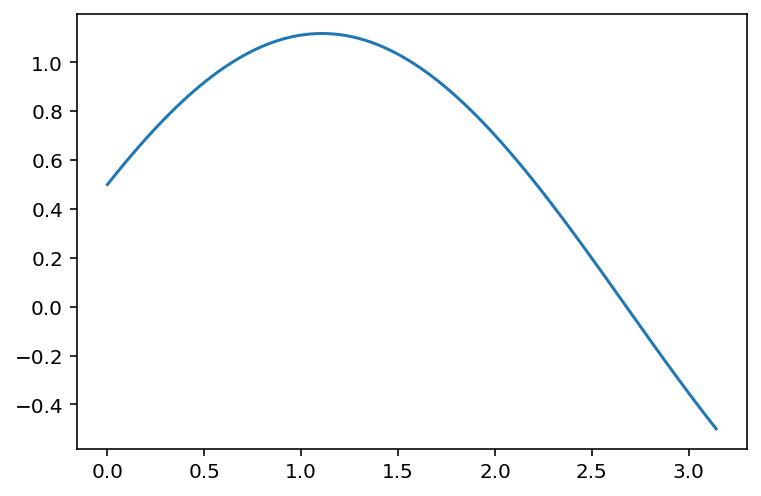

In [19]:
def r_theta_for_point(x, y):
    ret = [(rad, x*np.cos(rad) + y *np.sin(rad)) for rad in np.linspace(0, np.pi, 100)]
    return np.array(ret)

r_theta = r_theta_for_point(0.5, 1)
plt.plot(r_theta[:, 0], r_theta[:, 1])

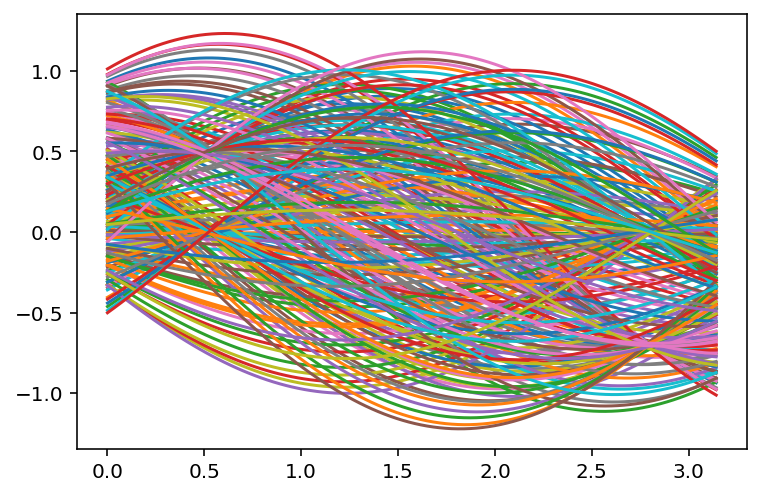

In [25]:
all_r_theta = []
#plt.figure(figsize=(10,10))
for x, y in data:
    r_theta = r_theta_for_point(x, y)
    all_r_theta.append(r_theta)
    plt.plot(r_theta[:, 0], r_theta[:, 1])
    
all_r_theta = np.vstack(all_r_theta)

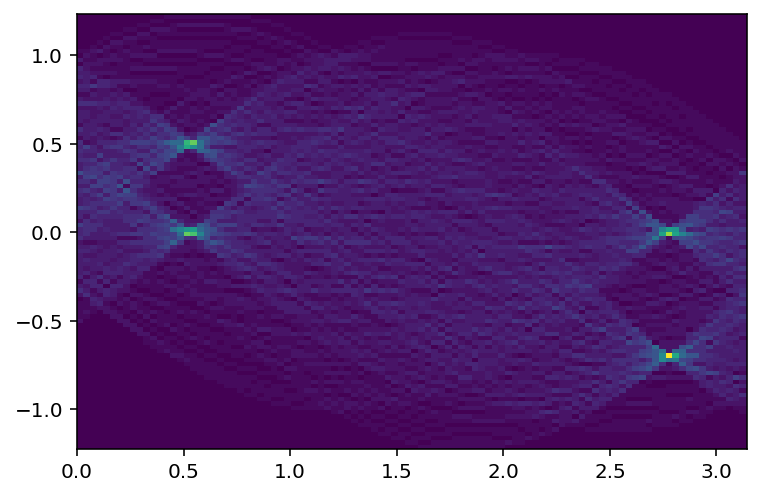

In [34]:
h, ex, ey, _ = plt.hist2d(all_r_theta[:, 0], all_r_theta[:, 1], bins=100);

In [37]:
hough_peaks = []
for (ix, iy), x in np.ndenumerate(h):
    if x > 20:
        if x == np.max(h[ix-3:ix+3, iy-3:iy+3]): # greaest is 7x7 windows
            hough_peaks.append((ex[ix], ey[iy]))
print(hough_peaks)

[(0.5026548245743669, -0.01922983630442432), (0.5340707511102649, 0.49628147084893715), (2.7646015351590183, -0.7065782458422395), (2.7646015351590183, -0.01922983630442432)]


## Accumulate the $r$ and $\theta$ for all the data points and make a 2d histogram.

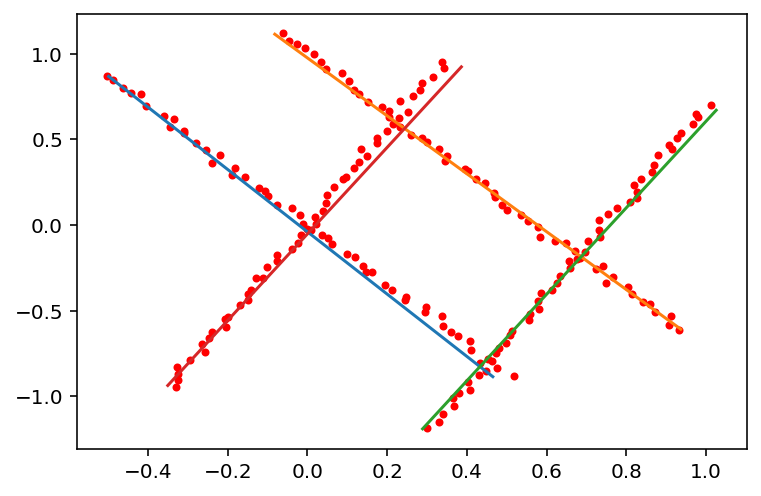

In [39]:
plt.plot(data[:, 0], data[:, 1], '.r')
for theta, r in hough_peaks:
    line = generate_line(r, theta)
    plt.plot(line[:,0], line[:, 1])

## Find the peaks. Easiest way is to just find x>threshold and x is the max within certain window.

In [40]:
h

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Draw the lines given the peak parameter

# Hough Transform Circle Version.

We can use voting mechanism to actually find any decently-defined geometry

In [42]:
np.random.seed(999)
def make_circle(x, y, r, noise=0.01):
    thetas = np.linspace(0, 2*np.pi, 100)
    ret = [np.array([x, y]) + (r+noise*np.random.randn())*np.array([np.cos(t), np.sin(t)]) for t in thetas]
    return np.array(ret)

c1 = make_circle(1, 1.5, 0.3)
#plt.plot(c1[:,0], c1[:,1], '.')
c2 = make_circle(2, 1, 0.3)
#plt.plot(c2[:,0], c2[:,1], '.')
c3 = make_circle(1, 0.5, 0.1)
#plt.plot(c3[:,0], c3[:,1], '.')
#plt.gca().set_aspect(1)

data = np.vstack([c1, c2, c3])
np.random.shuffle(data)

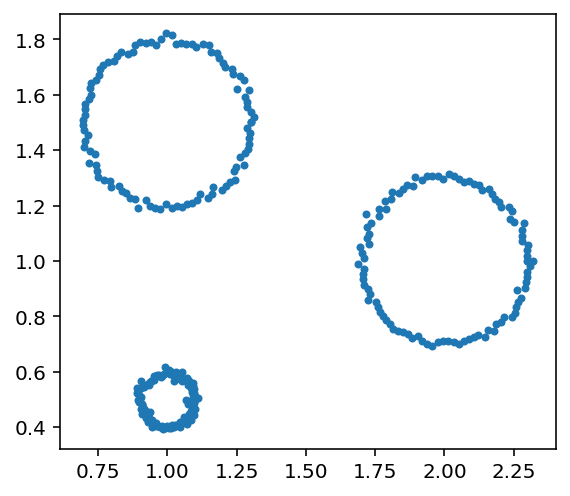

In [43]:
plt.plot(data[:,0], data[:, 1], '.')
plt.gca().set_aspect(1)

## How do we parametrize a circle?

In [44]:
max_x = np.max(data[:,0])
min_x = np.min(data[:,0])
max_y = np.max(data[:,1])
min_y = np.min(data[:,1])
def find_center_radius(x, y):
    ret = []
    for cx in np.linspace(min_x, max_x, 100):
        for cy in np.linspace(min_y, max_y, 100):
            r = np.sqrt((cx-x)**2 + (cy-y)**2)
            ret.append([cx, cy, r])
    return ret

In [45]:
all_params = []
for x, y in data:
    all_params.append(find_center_radius(x, y))
all_params =  np.vstack(all_params)
all_params

array([[0.69459274, 0.39417556, 1.41151562],
       [0.69459274, 0.40859055, 1.4083339 ],
       [0.69459274, 0.42300555, 1.40529283],
       ...,
       [2.32135532, 1.79243012, 1.91129808],
       [2.32135532, 1.80684511, 1.92095312],
       [2.32135532, 1.82126011, 1.9306675 ]])

## Given a point x,y what are the set of the parameter for the circle that pass through it.

In [46]:
all_params.shape

(3000000, 3)

## Accumulate

In [ ]:
h, edges = np.histogramdd(all_params, bins=100)

## Find Peak

## Draw the Circle... We can also use this to count the circle.